In [199]:
import pandas as pd
import geopandas as gpd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Load NYC Data

In [2]:
nyc = gpd.read_file('cleaned_data/nyc.geojson')
nyc = nyc[['Unique Identifier','geometry']]
nyc.columns=['neighborhood_id','geometry']
nyc.head()

,neighborhood_id,geometry
0,1,POLYGON ((-73.85663664103342 40.85811529295128...
1,2,POLYGON ((-74.17185166456856 40.56152092302123...
2,3,POLYGON ((-73.90202516499477 40.76741678384665...
3,4,POLYGON ((-74.00200394611576 40.59413237177825...
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...


# Load Feature Data & Normalize to Run Clustering

- merged[0:2] are neighborhood IDs/names
- merged[2:56] are quantitative features
- merged[56:272] are airbnb features
- merged[272:] are foursquare features

In [3]:
df = pd.read_csv('cleaned_data/merged.csv')

In [237]:
print(df.shape)
df.head()

(140, 685)


,neighborhood_id,neighborhood,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,...,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,kmean
0,1,Allerton,0.108378,-0.020591,-0.03306,0.015491,-0.037909,0.240096,-0.042261,0.014036,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,0
1,2,Arden Heights,-0.041109,-0.046798,-0.03306,-0.056201,-0.037909,-0.049319,-0.042261,-0.056636,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,1
2,3,Astoria,-0.041109,0.031823,-0.03306,0.015491,0.064153,-0.007974,-0.005963,0.006725,...,-0.001628,-0.002887,-0.015453,0.035060,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,2
3,4,Bath Beach,-0.041109,-0.020591,-0.03306,-0.038278,-0.037909,-0.007974,-0.042261,-0.044451,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206,1
4,5,Financial District,-0.041109,-0.046798,-0.03306,-0.020355,0.064153,-0.049319,-0.042261,-0.031454,...,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,0.056651,-0.020077,-0.008735,-0.006206,5


In [5]:
venues = pd.DataFrame(normalize(df.iloc[:,272:],axis=1),columns=df.columns[272:])
df.update(venues)
df.iloc[:,272:].head()

,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Amphitheater,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043685,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056077,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.112509,0.0,...,0.0,0.0,0.0,0.0,0.056254,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125491,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.062746,0.0,0.0,0.0


In [6]:
unstandardized = ['num_listings', 'price_norm', 'AdultCareFacilities', 'Clinics', 'CommunityHealthCenters', 'DiagnosticTreatmentCenters', 'Hospitals', 'NursingHomes', 'SchoolBasedHealthFacilities', 'Daycares', 'TotalPop', 'shape_area', 'rating_b',]
standardized = pd.DataFrame(normalize(df[unstandardized],axis=0),columns = unstandardized)
df.update(standardized)
df.loc[:,unstandardized].head()

,num_listings,price_norm,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,TotalPop,shape_area,rating_b
0,0.008870,0.053536,0.149487,0.026207,0.0,0.071692,0.000000,0.289414,0.000000,0.077170,0.082261,0.061155,0.086995
1,0.000576,0.048639,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.006499,0.030331,0.065763,0.085647
2,0.105864,0.102431,0.000000,0.078621,0.0,0.071692,0.102062,0.041345,0.036298,0.069859,0.125869,0.071692,0.088122
3,0.003110,0.069097,0.000000,0.026207,0.0,0.017923,0.000000,0.041345,0.000000,0.018683,0.037913,0.026788,0.079220
4,0.095842,0.145779,0.000000,0.000000,0.0,0.035846,0.102062,0.000000,0.000000,0.031680,0.050333,0.024805,0.074938


In [7]:
percents = ['FemalePopPercent', 'PopU18PopPercent', 'Pop18t24PopPercent', 'Pop25t44PopPercent', 'Pop45t64PopPercent', 'Pop65plPopPercent', 'HispanicPopPercent', 'WhiteNonHispPopPercent', 'BlackNonHispPopPercent', 'AsianPIPopPercent', 'OtherRacePopPercent', 'ForeignBornPopPercent', 'LimitedEngPopPercent', 'EduLessThanHSPopPercent', 'PovertyPopPercent', 'FoodStampSNAPPopPercent', 'UnemploymentPopPercent', 'DisabilityPopPercent', 'DisabilityVisionPopPercent', 'DisabilityCognitivePopPercent', 'DisabilityAmbulatoryPopPercent', 'DisabilitySelfCarePopPercent', 'DisabilityIndepLivPopPercent', 'HealthInsPopPercent', 'MedicaidEnrollPopPercent', 'AlcoholRetailersPopPercent', 'TobaccoRetailersPopPercent', 'FelonyCrimePopPercent', 'PropertyCrimePopPercent', 'ViolentCrimePopPercent', 'JailIncarcerationPopPercent', 'AssaultHospPopPercent', 'AlcoholHospPopPercent', 'DrugHospPopPercent', 'PsychHospPopPercent', 'StrokeHospPopPercent', 'HIVPopPercent', 'HepBPopPercent', 'HepCPopPercent', 'TBPopPercent', 'GonorrheaPopPercent', 'SyphilisPopPercent', 'PrematureMortalityPopPercent']
df.update(df[percents]/100)
df.loc[:,percents].head()

,FemalePopPercent,PopU18PopPercent,Pop18t24PopPercent,Pop25t44PopPercent,Pop45t64PopPercent,Pop65plPopPercent,HispanicPopPercent,WhiteNonHispPopPercent,BlackNonHispPopPercent,AsianPIPopPercent,...,DrugHospPopPercent,PsychHospPopPercent,StrokeHospPopPercent,HIVPopPercent,HepBPopPercent,HepCPopPercent,TBPopPercent,GonorrheaPopPercent,SyphilisPopPercent,PrematureMortalityPopPercent
0,0.512237,0.227275,0.097200,0.279476,0.252312,0.143249,0.415992,0.187734,0.308387,0.065012,...,0.010634,0.006763,0.003495,0.000287,0.000661,0.001066,0.000058,0.001843,0.000345,0.001819
1,0.505000,0.210000,0.092000,0.267000,0.303000,0.128000,0.119000,0.796000,0.014000,0.063000,...,0.005190,0.005225,0.002876,0.000000,0.000124,0.000425,0.000039,0.000000,0.000000,0.001400
2,0.500823,0.140895,0.102036,0.425221,0.209708,0.123044,0.294479,0.470377,0.063010,0.146859,...,0.004023,0.004621,0.002823,0.000419,0.000486,0.000715,0.000088,0.001854,0.000546,0.001346
3,0.491000,0.202000,0.074000,0.317000,0.247000,0.159000,0.152000,0.472000,0.012000,0.352000,...,0.002965,0.003145,0.002610,0.000000,0.001909,0.000879,0.000146,0.000219,0.000000,0.001264
4,0.516000,0.138000,0.110000,0.529000,0.160000,0.064000,0.091000,0.653000,0.029000,0.197000,...,0.003816,0.003304,0.002728,0.000287,0.000584,0.000627,0.000039,0.001624,0.000447,0.000792


In [8]:
# subtract to get mean = 0 for all features
df.iloc[:,2:] = df.iloc[:,2:].subtract(df.mean(axis=0),axis=1)

In [9]:
df.sum()

neighborhood_id                                                              10180
neighborhood                     AllertonArden HeightsAstoriaBath BeachFinancia...
AdultCareFacilities                                                   -2.91434e-16
Clinics                                                                3.46945e-16
CommunityHealthCenters                                                           0
DiagnosticTreatmentCenters                                              -3.747e-16
Hospitals                                                              2.35922e-16
NursingHomes                                                             2.498e-16
SchoolBasedHealthFacilities                                           -1.01308e-15
Daycares                                                               7.63278e-17
TotalPop                                                               1.98452e-15
shape_area                                                            -3.26128e-16
rati

# Split Qualitative & Quantitative Datasets

In [10]:
df.shape

(140, 684)

In [11]:
quant = df.iloc[:,:56]
print(quant.shape)
quant.head()

(140, 56)


,neighborhood_id,neighborhood,AdultCareFacilities,Clinics,CommunityHealthCenters,DiagnosticTreatmentCenters,Hospitals,NursingHomes,SchoolBasedHealthFacilities,Daycares,...,DrugHospPopPercent,PsychHospPopPercent,StrokeHospPopPercent,HIVPopPercent,HepBPopPercent,HepCPopPercent,TBPopPercent,GonorrheaPopPercent,SyphilisPopPercent,PrematureMortalityPopPercent
0,1,Allerton,0.108378,-0.020591,-0.03306,0.015491,-0.037909,0.240096,-0.042261,0.014036,...,0.001813,-0.000506,0.000307,0.000031,-0.000180,0.000149,-0.000006,0.000329,-0.000005,0.000194
1,2,Arden Heights,-0.041109,-0.046798,-0.03306,-0.056201,-0.037909,-0.049319,-0.042261,-0.056636,...,-0.003631,-0.002044,-0.000313,-0.000256,-0.000717,-0.000492,-0.000025,-0.001514,-0.000350,-0.000225
2,3,Astoria,-0.041109,0.031823,-0.03306,0.015491,0.064153,-0.007974,-0.005963,0.006725,...,-0.004798,-0.002648,-0.000365,0.000163,-0.000355,-0.000202,0.000024,0.000340,0.000196,-0.000279
3,4,Bath Beach,-0.041109,-0.020591,-0.03306,-0.038278,-0.037909,-0.007974,-0.042261,-0.044451,...,-0.005856,-0.004124,-0.000579,-0.000256,0.001068,-0.000038,0.000082,-0.001295,-0.000350,-0.000361
4,5,Financial District,-0.041109,-0.046798,-0.03306,-0.020355,0.064153,-0.049319,-0.042261,-0.031454,...,-0.005005,-0.003965,-0.000461,0.000031,-0.000257,-0.000290,-0.000025,0.000110,0.000097,-0.000833


In [12]:
qual = pd.concat([df.iloc[:,:2],df.iloc[:,56:]],axis=1)
print(qual.shape)
qual.head()

(140, 630)


,neighborhood_id,neighborhood,accessible,airport,amazing,american,anywhere,architecture,art,artists,...,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,1,Allerton,0.015268,-0.032981,-0.022373,-0.021746,0.008232,-0.007477,-0.031978,-0.010914,...,-0.001304,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206
1,2,Arden Heights,-0.020446,-0.050839,-0.040230,-0.021746,-0.009625,-0.007477,-0.031978,-0.010914,...,-0.001304,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206
2,3,Astoria,-0.011972,-0.008466,0.069940,0.015542,-0.001151,-0.004088,-0.011639,0.000950,...,-0.001304,-0.001628,-0.002887,-0.015453,0.035060,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206
3,4,Bath Beach,0.032185,0.001793,0.012402,-0.021746,-0.009625,-0.007477,-0.031978,-0.010914,...,-0.001304,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,-0.006095,-0.020077,-0.008735,-0.006206
4,5,Financial District,-0.017135,-0.021037,-0.015395,0.026267,-0.003003,0.012390,-0.030322,-0.010914,...,-0.001304,-0.001628,-0.002887,-0.015453,-0.021195,-0.011688,0.056651,-0.020077,-0.008735,-0.006206


In [13]:
qual_airbnb = pd.concat([df.iloc[:,:2],df.iloc[:,56:272]],axis=1)
qual_foursquare = pd.concat([df.iloc[:,:2],df.iloc[:,272:]],axis=1)

# Try K-Means to see if there's an optimal number of clusters

## Combined Data

In [14]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 257.26583292251104
2 228.08357381367998
3 214.38057233491824
4 202.63400431505758
5 191.1508749327049
6 186.88588858715224
7 175.6047775624622
8 177.33957031768557
9 166.86778722771766
10 165.99593768370516
11 160.21782284971306
12 157.47473131905332
13 153.25533864674009
14 152.19687229560162
15 148.65866815748987
16 145.33378092202233
17 144.35923464199212
18 141.64521817907254
19 133.62193792836064
20 134.79511503725936
21 131.78266798009005
22 129.78787337650692
23 127.10176054417462
24 124.72109887943374
25 120.4770934744231
26 119.23597760624665
27 117.99964424365764
28 116.14122927457028
29 114.59403376639374
30 110.84422399543062
31 108.9500492565745
32 105.78200680734611
33 105.5415356231439
34 102.7458088648881
35 99.97091267823332
36 98.0394340824453
37 96.72233972999645
38 95.5415528477354
39 93.695524772403
40 92.00598920578742
41 90.78287730287707
42 87.98437065910225
43 87.54679816926223
44 84.82084107053558
45 84.30532107329616
46 82.23837335282529
47 81.4523225409107

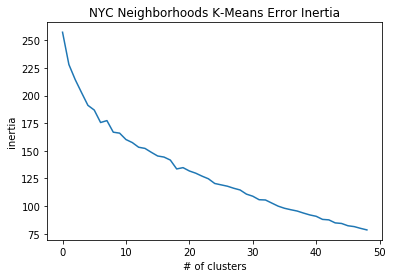

In [15]:
error_df['inertia'].plot()
plt.title('NYC Neighborhoods K-Means Error Inertia')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.savefig('images/kmean_error.png')

## Quantitative Data

In [16]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:56].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 51.67591882569468
2 31.091493549882596
3 23.7659143515858
4 19.198721487253714
5 17.57555121388701
6 16.362461270094375
7 15.175354975763707
8 14.358289924682369
9 13.581036206805937
10 13.014740423779688
11 12.287545332977945
12 11.814346638294964
13 11.59027964399947
14 11.03527762625569
15 10.857053418578651
16 10.314401523270764
17 9.840617557440652
18 9.659763129493623
19 9.17391373723147
20 8.838100829670873
21 8.61632796661766
22 8.42728229536465
23 8.008963226534465
24 7.753016281535922
25 7.462927090863626
26 7.277663269276273
27 7.384315189861367
28 7.198762581998054
29 7.0268393307711285
30 6.802398056007315
31 6.558699002421093
32 6.3831400013645485
33 6.30171098366819
34 6.089950445325803
35 5.892602830812724
36 5.621784904933039
37 5.563397330445277
38 5.41507237225189
39 5.2172426326527415
40 5.203376017665003
41 5.099958756904835
42 4.910875559627939
43 4.835535532093264
44 4.68300115004722
45 4.653746331153336
46 4.551403489423887
47 4.3743758286824725
48 4.313660349

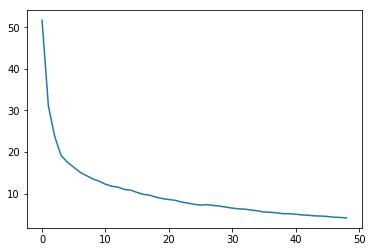

In [17]:
error_df['inertia'].plot()

## Qualitative Data

In [18]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,56:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 205.58991409681636
2 186.91927161310608
3 179.62281428525077
4 169.46223685126287
5 158.39942562400842
6 160.58496687943597
7 158.1270021523609
8 148.2018399182453
9 146.6360337634079
10 142.3643964900083
11 139.66607300636616
12 135.62745506599842
13 135.46625300385915
14 128.12098498596416
15 129.1806528574166
16 126.36453916654672
17 120.6787286804805
18 122.47756827063336
19 118.36679114101003
20 113.27952878192352
21 112.53525555231806
22 107.53095177232767
23 107.450011416206
24 106.77737404294074
25 101.92092405146197
26 102.28601378116672
27 101.04018745862366
28 96.27873045122935
29 96.18809079415672
30 91.55459160672437
31 93.13318451577989
32 87.80731003111237
33 87.03758406036881
34 87.33072481964672
35 83.78124365924302
36 82.27957806797991
37 83.68390103002523
38 80.53266210092463
39 77.65360329185647
40 77.10441286372718
41 76.26381092270938
42 75.67806103124515
43 73.85925962353508
44 71.76213236350435
45 70.97493904914646
46 69.80915358468285
47 68.85975332533936
48 

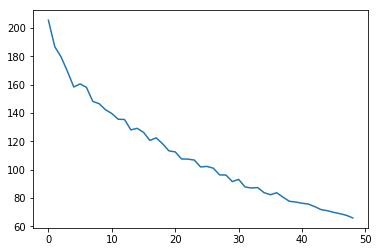

In [19]:
error_df['inertia'].plot()

Let's try 8 clusters for now

In [20]:
n_clusters = 8

# Run PCA

In [21]:
pc_cols = ['pc1','pc2','pc3'] # get top 3 principal components

## Combined Dataset

In [22]:
df.columns

Index(['neighborhood_id', 'neighborhood', 'AdultCareFacilities', 'Clinics',
       'CommunityHealthCenters', 'DiagnosticTreatmentCenters', 'Hospitals',
       'NursingHomes', 'SchoolBasedHealthFacilities', 'Daycares',
       ...
       'Waterfront', 'Weight Loss Center', 'Whisky Bar', 'Wine Bar',
       'Wine Shop', 'Wings Joint', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=684)

In [23]:
pca = PCA(n_components=3)
features = df.iloc[:,2:].values
principalComponents = pca.fit_transform(features)
pca_by_neighborhood = pd.DataFrame(data = principalComponents, columns = pc_cols)
pca.explained_variance_ratio_

array([0.14374915, 0.08500909, 0.0555122 ])

In [24]:
pcaFeaturesDf = pd.DataFrame(data = pca.components_.T, columns = pc_cols)
pcaFeaturesDf = pd.concat([pcaFeaturesDf,pd.Series(df.columns[2:])],axis=1)

In [25]:
pcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
19,0.293062,BlackNonHispPopPercent
17,0.258121,HispanicPopPercent
35,0.242585,MedicaidEnrollPopPercent
26,0.219226,FoodStampSNAPPopPercent
24,0.157443,EduLessThanHSPopPercent


In [26]:
pcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
18,-0.500734,WhiteNonHispPopPercent
215,-0.162735,restaurants
357,-0.160866,Coffee Shop
69,-0.151861,bars
472,-0.147794,Italian Restaurant


In [27]:
pcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
69,0.295274,bars
215,0.246723,restaurants
17,0.243273,HispanicPopPercent
303,0.196296,Bar
26,0.166404,FoodStampSNAPPopPercent


In [28]:
pcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
210,-0.238673,quiet
18,-0.185140,WhiteNonHispPopPercent
387,-0.179925,Donut Shop
551,-0.179183,Pharmacy
174,-0.175553,mall


## Quantitative Only

In [45]:
quant.columns

Index(['neighborhood_id', 'neighborhood', 'AdultCareFacilities', 'Clinics',
       'CommunityHealthCenters', 'DiagnosticTreatmentCenters', 'Hospitals',
       'NursingHomes', 'SchoolBasedHealthFacilities', 'Daycares', 'TotalPop',
       'shape_area', 'rating_b', 'FemalePopPercent', 'PopU18PopPercent',
       'Pop18t24PopPercent', 'Pop25t44PopPercent', 'Pop45t64PopPercent',
       'Pop65plPopPercent', 'HispanicPopPercent', 'WhiteNonHispPopPercent',
       'BlackNonHispPopPercent', 'AsianPIPopPercent', 'OtherRacePopPercent',
       'ForeignBornPopPercent', 'LimitedEngPopPercent',
       'EduLessThanHSPopPercent', 'PovertyPopPercent',
       'FoodStampSNAPPopPercent', 'UnemploymentPopPercent',
       'DisabilityPopPercent', 'DisabilityVisionPopPercent',
       'DisabilityCognitivePopPercent', 'DisabilityAmbulatoryPopPercent',
       'DisabilitySelfCarePopPercent', 'DisabilityIndepLivPopPercent',
       'HealthInsPopPercent', 'MedicaidEnrollPopPercent',
       'AlcoholRetailersPopPercent',

In [46]:
quant_features = quant.iloc[:,2:].values
quant_features

array([[ 1.08378088e-01, -2.05913093e-02, -3.30603462e-02, ...,
         3.29170417e-04, -4.69470114e-06,  1.94168207e-04],
       [-4.11089301e-02, -4.67984302e-02, -3.30603462e-02, ...,
        -1.51410343e-03, -3.50134871e-04, -2.24929353e-04],
       [-4.11089301e-02,  3.18229325e-02, -3.30603462e-02, ...,
         3.40014507e-04,  1.95798449e-04, -2.78908833e-04],
       ...,
       [ 3.36345792e-02,  3.18229325e-02,  2.04295985e-01, ...,
         5.80611567e-04,  3.80684589e-05, -1.49024653e-04],
       [-4.11089301e-02, -4.67984302e-02, -3.30603462e-02, ...,
        -8.33103433e-04, -3.50134871e-04, -5.13929353e-04],
       [-4.11089301e-02, -2.05913093e-02, -3.30603462e-02, ...,
        -7.47103433e-04, -1.05134871e-04, -3.62929353e-04]])

In [99]:
quant_pca = PCA(n_components=3)
quantPrincipalComponents = quant_pca.fit_transform(quant_features)
quant_pca_by_neighborhood = pd.DataFrame(data = quantPrincipalComponents, columns = pc_cols)
quant_pca.explained_variance_ratio_

array([0.50073349, 0.19298896, 0.09384365])

In [48]:
quantPcaFeaturesDf = pd.DataFrame(data = quant_pca.components_.T, columns = pc_cols)
quantPcaFeaturesDf = pd.concat([quantPcaFeaturesDf,pd.Series(quant.columns[2:])],axis=1)
quantPcaFeaturesDf.head()

,pc1,pc2,pc3,0
0,-0.004770,-0.009129,0.024981,AdultCareFacilities
1,0.012488,-0.023876,-0.022059,Clinics
2,0.028920,-0.018229,-0.015088,CommunityHealthCenters
3,0.036351,-0.022738,-0.038961,DiagnosticTreatmentCenters
4,0.002482,-0.010266,0.011433,Hospitals


In [78]:
quantPcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
17,0.369308,HispanicPopPercent
35,0.333227,MedicaidEnrollPopPercent
19,0.310593,BlackNonHispPopPercent
26,0.306917,FoodStampSNAPPopPercent
24,0.219774,EduLessThanHSPopPercent


In [79]:
quantPcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
18,-0.623433,WhiteNonHispPopPercent
34,-0.086369,HealthInsPopPercent
20,-0.057401,AsianPIPopPercent
16,-0.048408,Pop65plPopPercent
14,-0.038073,Pop25t44PopPercent


In [80]:
quantPcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
19,0.741247,BlackNonHispPopPercent
34,0.065448,HealthInsPopPercent
11,0.044763,FemalePopPercent
15,0.026085,Pop45t64PopPercent
9,0.016885,shape_area


In [81]:
quantPcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
17,-0.362828,HispanicPopPercent
23,-0.352785,LimitedEngPopPercent
35,-0.206937,MedicaidEnrollPopPercent
18,-0.203236,WhiteNonHispPopPercent
20,-0.186205,AsianPIPopPercent


## Qualitative Features Only

In [29]:
qual.columns[2:]

Index(['accessible', 'airport', 'amazing', 'american', 'anywhere',
       'architecture', 'art', 'artists', 'authentic', 'available',
       ...
       'Waterfront', 'Weight Loss Center', 'Whisky Bar', 'Wine Bar',
       'Wine Shop', 'Wings Joint', 'Women's Store', 'Yoga Studio', 'Zoo',
       'Zoo Exhibit'],
      dtype='object', length=628)

In [30]:
qual_features = qual.iloc[:,2:].values
qual_features

array([[ 0.01526812, -0.03298137, -0.02237259, ..., -0.02007721,
        -0.00873508, -0.00620597],
       [-0.02044617, -0.05083851, -0.04022973, ..., -0.02007721,
        -0.00873508, -0.00620597],
       [-0.01197159, -0.00846563,  0.06993976, ..., -0.02007721,
        -0.00873508, -0.00620597],
       ...,
       [-0.01116449, -0.0492243 ,  0.08688891, ...,  0.07462554,
        -0.00873508, -0.00620597],
       [ 0.00733161, -0.05083851,  0.0893999 , ..., -0.02007721,
        -0.00873508, -0.00620597],
       [-0.02044617,  0.01672906, -0.04022973, ..., -0.02007721,
        -0.00873508, -0.00620597]])

In [98]:
qual_pca = PCA(n_components=3)
qual_principal_components = qual_pca.fit_transform(qual_features)
qual_pca_by_neighborhood = pd.DataFrame(data = qual_principal_components, columns = pc_cols)
qual_pca.explained_variance_ratio_

array([0.11714256, 0.06342647, 0.05916368])

In [32]:
qualPcaFeaturesDf = pd.DataFrame(data = qual_pca.components_.T, columns = pc_cols)
qualPcaFeaturesDf = pd.concat([qualPcaFeaturesDf,pd.Series(qual.columns[2:])],axis=1)

In [33]:
qualPcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
15,0.346917,bars
161,0.328781,restaurants
249,0.266679,Bar
303,0.228521,Coffee Shop
38,0.131962,coffee


In [34]:
qualPcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
333,-0.259958,Donut Shop
497,-0.218299,Pharmacy
350,-0.162766,Fast Food Restaurant
120,-0.159930,mall
291,-0.158509,Caribbean Restaurant


In [35]:
qualPcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
62,0.378251,eat
150,0.264960,places
79,0.255733,free
179,0.253450,stores
206,0.247686,walking


In [36]:
qualPcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
168,-0.087895,shopping
297,-0.046186,Chinese Restaurant
165,-0.045987,safe
181,-0.043753,subway
128,-0.038759,museum


## Airbnb Features

In [39]:
qual_pca_airbnb = PCA(n_components=3)
pc = qual_pca_airbnb.fit_transform(qual_airbnb.iloc[:,2:].values)
qual_pca_by_neighborhood_airbnb = pd.DataFrame(data = pc, columns = pc_cols)
qual_pca_airbnb.explained_variance_ratio_

array([0.11199721, 0.09487603, 0.09027248])

In [70]:
airbnb_features = pd.DataFrame(data = qual_pca_airbnb.components_.T, columns = pc_cols)
airbnb_features = pd.concat([airbnb_features,pd.Series(qual_airbnb.columns[2:])],axis=1)

In [71]:
airbnb_features.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
161,0.538672,restaurants
15,0.437398,bars
169,0.212634,shops
38,0.184446,coffee
214,0.131736,num_listings


In [72]:
airbnb_features.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
120,-0.222304,mall
156,-0.190754,quiet
26,-0.127628,bus
168,-0.123338,shopping
165,-0.111878,safe


In [73]:
airbnb_features.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
62,0.370987,eat
150,0.294700,places
79,0.288900,free
206,0.280188,walking
179,0.275376,stores


In [74]:
airbnb_features.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
15,-0.111120,bars
168,-0.072106,shopping
165,-0.065816,safe
181,-0.058623,subway
208,-0.055649,well


## Foursquare Features

In [40]:
qual_pca_foursquare = PCA(n_components=3)
pc = qual_pca_foursquare.fit_transform(qual_foursquare.iloc[:,2:].values)
qual_pca_by_neighborhood_foursquare = pd.DataFrame(data = pc, columns = pc_cols)
qual_pca_foursquare.explained_variance_ratio_

array([0.18016838, 0.07248805, 0.05386869])

In [43]:
foursquare_features = pd.DataFrame(data = qual_pca_foursquare.components_.T, columns = pc_cols)
foursquare_features = pd.concat([foursquare_features,pd.Series(qual_foursquare.columns[2:])],axis=1)
foursquare_features.head()

,pc1,pc2,pc3,0
0,0.001918,-0.001003,-0.000893,Accessories Store
1,-0.001712,-0.002192,0.001245,Afghan Restaurant
2,0.006781,-0.002767,-0.015620,African Restaurant
3,-0.000206,-0.002792,0.003084,Airport
4,-0.000217,-0.001436,0.005505,Airport Food Court


In [82]:
foursquare_features.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
117,0.390934,Donut Shop
281,0.310154,Pharmacy
75,0.302185,Caribbean Restaurant
134,0.259976,Fast Food Restaurant
112,0.241222,Discount Store


In [83]:
foursquare_features.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
33,-0.326653,Bar
87,-0.305582,Coffee Shop
202,-0.194672,Italian Restaurant
69,-0.140273,Café
86,-0.138329,Cocktail Bar


In [84]:
foursquare_features.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
202,0.523510,Italian Restaurant
39,0.215205,Beach
30,0.204106,Bagel Shop
32,0.186461,Bank
360,0.151011,Sushi Restaurant


In [85]:
foursquare_features.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
75,-0.374828,Caribbean Restaurant
33,-0.269849,Bar
235,-0.185436,Mexican Restaurant
87,-0.168032,Coffee Shop
150,-0.141788,Fried Chicken Joint


# K-Means Clustering of Data

## Combined Dataset

In [52]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(features)
Kmean.labels_

array([0, 1, 2, 1, 5, 1, 1, 1, 2, 1, 0, 1, 1, 1, 7, 1, 5, 3, 2, 3, 3, 0,
       1, 6, 5, 1, 5, 2, 0, 2, 3, 1, 6, 0, 0, 7, 2, 0, 5, 6, 1, 2, 1, 7,
       3, 7, 0, 3, 5, 3, 7, 6, 2, 3, 7, 0, 1, 2, 2, 1, 1, 2, 5, 1, 5, 1,
       2, 5, 0, 3, 1, 1, 0, 7, 3, 1, 7, 1, 1, 7, 5, 3, 7, 0, 2, 1, 7, 0,
       1, 5, 1, 1, 5, 0, 0, 6, 1, 1, 0, 0, 7, 7, 6, 2, 3, 3, 2, 2, 1, 7,
       6, 7, 1, 4, 1, 0, 7, 3, 3, 1, 5, 7, 7, 7, 0, 5, 0, 0, 5, 5, 3, 7,
       1, 5, 0, 1, 3, 2, 2, 7], dtype=int32)

In [53]:
df['kmean'] = Kmean.labels_
df[['kmean','neighborhood_id','neighborhood']].head()

pca_by_neighborhood = pd.concat([pca_by_neighborhood, df[['kmean','neighborhood_id','neighborhood']]], axis = 1)
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,0.558559,-0.331812,-0.021246,0,1,Allerton
1,-0.425649,-0.588502,0.123190,1,2,Arden Heights
2,-0.428455,0.492422,-0.106683,2,3,Astoria
3,-0.258902,-0.087656,0.394263,1,4,Bath Beach
4,-0.680458,0.124335,-0.067736,5,5,Financial District


## Qualitative Dataset

In [106]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(qual_features)
Kmean.labels_

array([1, 4, 2, 4, 3, 4, 4, 4, 2, 4, 1, 4, 4, 4, 1, 4, 3, 1, 2, 1, 1, 1,
       4, 6, 3, 0, 3, 2, 1, 2, 1, 1, 4, 5, 5, 1, 2, 1, 2, 4, 4, 3, 4, 5,
       1, 5, 1, 1, 3, 1, 5, 4, 2, 1, 5, 5, 5, 3, 2, 4, 5, 2, 3, 4, 2, 4,
       3, 3, 5, 1, 1, 4, 1, 5, 1, 1, 5, 5, 4, 5, 3, 1, 3, 1, 2, 4, 5, 2,
       1, 3, 4, 1, 3, 5, 1, 4, 1, 5, 1, 1, 1, 1, 4, 2, 1, 1, 2, 2, 1, 1,
       4, 2, 4, 7, 4, 1, 1, 1, 1, 4, 3, 5, 5, 5, 4, 3, 1, 1, 2, 3, 1, 5,
       4, 3, 1, 4, 1, 2, 3, 1], dtype=int32)

In [107]:
qual['kmean'] = Kmean.labels_
qual[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,1,1,Allerton
1,4,2,Arden Heights
2,2,3,Astoria
3,4,4,Bath Beach
4,3,5,Financial District


In [108]:
qual_pca_by_neighborhood = pd.concat([qual_pca_by_neighborhood, qual[['kmean','neighborhood_id','neighborhood']]], axis = 1)
qual_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,-0.593574,-0.051694,-0.098213,1,1,Allerton
1,-0.290431,-0.099457,0.081267,4,2,Arden Heights
2,0.614982,0.011027,-0.096532,2,3,Astoria
3,0.048321,-0.160429,0.115733,4,4,Bath Beach
4,0.425105,-0.196728,0.299733,3,5,Financial District


## Quantitative Dataset

In [94]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(quant_features)
Kmean.labels_

array([1, 5, 4, 4, 0, 5, 7, 1, 1, 7, 3, 4, 4, 5, 7, 4, 0, 6, 3, 6, 6, 3,
       5, 5, 0, 5, 2, 5, 3, 0, 6, 7, 5, 3, 3, 3, 6, 3, 0, 5, 7, 0, 4, 3,
       6, 1, 3, 1, 0, 6, 2, 5, 1, 6, 2, 3, 4, 1, 4, 7, 5, 0, 0, 4, 0, 1,
       1, 0, 3, 6, 5, 1, 3, 7, 1, 7, 4, 4, 4, 1, 0, 6, 1, 3, 1, 4, 3, 3,
       5, 0, 4, 5, 0, 3, 3, 5, 5, 5, 3, 3, 1, 4, 5, 0, 6, 6, 1, 0, 7, 7,
       5, 7, 1, 5, 1, 3, 7, 6, 6, 4, 0, 7, 2, 5, 3, 0, 3, 3, 0, 0, 6, 3,
       5, 0, 1, 5, 6, 4, 5, 7], dtype=int32)

In [95]:
quant['kmean'] = Kmean.labels_
quant[['kmean','neighborhood_id','neighborhood']].head()

,kmean,neighborhood_id,neighborhood
0,1,1,Allerton
1,5,2,Arden Heights
2,4,3,Astoria
3,4,4,Bath Beach
4,0,5,Financial District


In [100]:
quant_pca_by_neighborhood = pd.concat([quant_pca_by_neighborhood, quant[['kmean','neighborhood_id','neighborhood']]], axis = 1)
quant_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,0.249003,0.051543,-0.022568,1,1,Allerton
1,-0.629401,0.016948,-0.178652,5,2,Arden Heights
2,-0.146682,-0.155728,0.068805,4,3,Astoria
3,-0.148924,-0.263457,0.278776,4,4,Bath Beach
4,-0.565829,0.020939,0.015304,0,5,Financial District


# Map colors to be similar between datasets

This is done by manually looking at the similar big areas within the NYC map

In [118]:
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,0.558559,-0.331812,-0.021246,0,1,Allerton
1,-0.425649,-0.588502,0.123190,1,2,Arden Heights
2,-0.428455,0.492422,-0.106683,2,3,Astoria
3,-0.258902,-0.087656,0.394263,1,4,Bath Beach
4,-0.680458,0.124335,-0.067736,5,5,Financial District


In [129]:
qual_pca_by_neighborhood.kmean = qual_pca_by_neighborhood.kmean.replace(
    {6:0,0:1,2:2,1:3,7:4,3:5,4:6,5:7})
qual_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,-0.593574,-0.051694,-0.098213,3,1,Allerton
1,-0.290431,-0.099457,0.081267,6,2,Arden Heights
2,0.614982,0.011027,-0.096532,2,3,Astoria
3,0.048321,-0.160429,0.115733,6,4,Bath Beach
4,0.425105,-0.196728,0.299733,5,5,Financial District


In [179]:
quant_pca_by_neighborhood.kmean = quant_pca_by_neighborhood.kmean.replace(
    {0:5,1:2,2:7,3:0,4:1,5:6,6:3,7:4})
quant_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id,neighborhood
0,0.249003,0.051543,-0.022568,2,1,Allerton
1,-0.629401,0.016948,-0.178652,6,2,Arden Heights
2,-0.146682,-0.155728,0.068805,1,3,Astoria
3,-0.148924,-0.263457,0.278776,1,4,Bath Beach
4,-0.565829,0.020939,0.015304,5,5,Financial District


# PCA Plots of Data

In [243]:
#get color map 
cmap = ListedColormap(sns.color_palette("bright",8))

## Combined

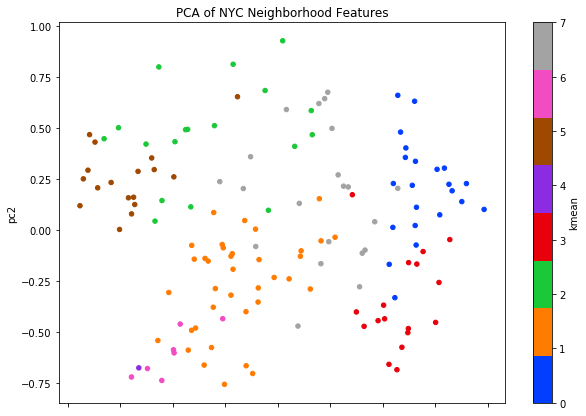

In [244]:
pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                 colormap = cmap, figsize=(10,7))
plt.title('PCA of NYC Neighborhood Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_all.png')

## Qualitative

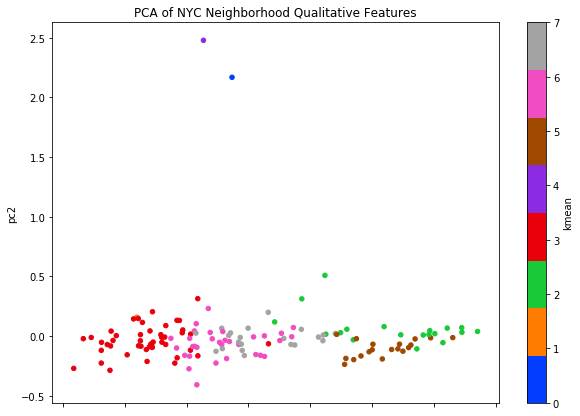

In [245]:
qual_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                      colormap = cmap, figsize=(10,7))
plt.title('PCA of NYC Neighborhood Qualitative Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_qual.png')

## Quantitative

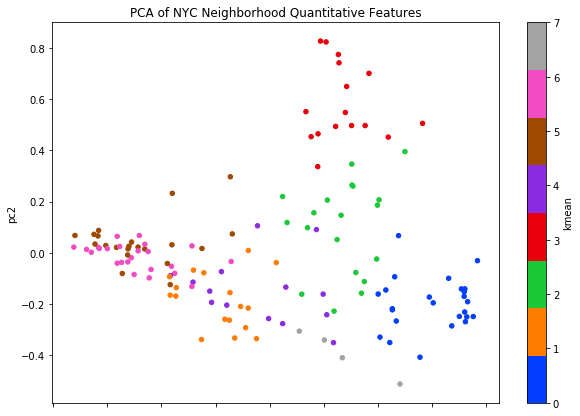

In [246]:
quant_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                       colormap = cmap,figsize=(10,7))
plt.title('PCA of NYC Neighborhood Quantitative Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_quant.png')

# Maps Plotting Clustered Neighborhoods

In [205]:
nyc_all = nyc.merge(pca_by_neighborhood,on='neighborhood_id')
nyc_all.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,0.558559,-0.331812,-0.021246,0,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.425649,-0.588502,0.123190,1,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,-0.428455,0.492422,-0.106683,2,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.258902,-0.087656,0.394263,1,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,-0.680458,0.124335,-0.067736,5,Financial District


In [130]:
nyc_qual = nyc.merge(qual_pca_by_neighborhood,on='neighborhood_id')
nyc_qual.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,-0.593574,-0.051694,-0.098213,3,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.290431,-0.099457,0.081267,6,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,0.614982,0.011027,-0.096532,2,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,0.048321,-0.160429,0.115733,6,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,0.425105,-0.196728,0.299733,5,Financial District


In [236]:
nyc_quant = nyc.merge(quant_pca_by_neighborhood,on='neighborhood_id')
nyc_quant.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean,neighborhood
0,1,POLYGON ((-73.85663664103342 40.85811529295128...,0.249003,0.051543,-0.022568,2,Allerton
1,2,POLYGON ((-74.17185166456856 40.56152092302123...,-0.629401,0.016948,-0.178652,6,Arden Heights
2,3,POLYGON ((-73.90202516499477 40.76741678384665...,-0.146682,-0.155728,0.068805,1,Astoria
3,4,POLYGON ((-74.00200394611576 40.59413237177825...,-0.148924,-0.263457,0.278776,1,Bath Beach
4,5,(POLYGON ((-74.00078295209646 40.6942865161671...,-0.565829,0.020939,0.015304,5,Financial District


/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


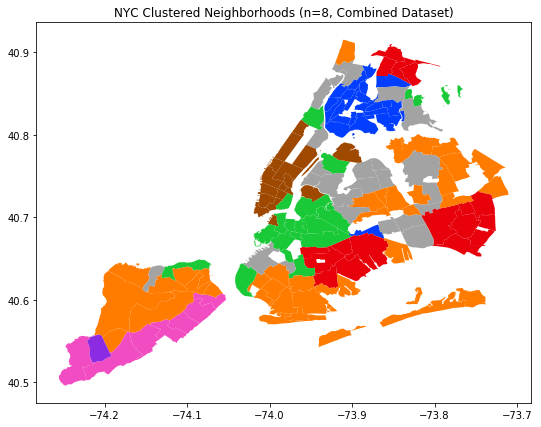

In [247]:
nyc_all.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=8, Combined Dataset)')
plt.savefig('images/map_combined.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


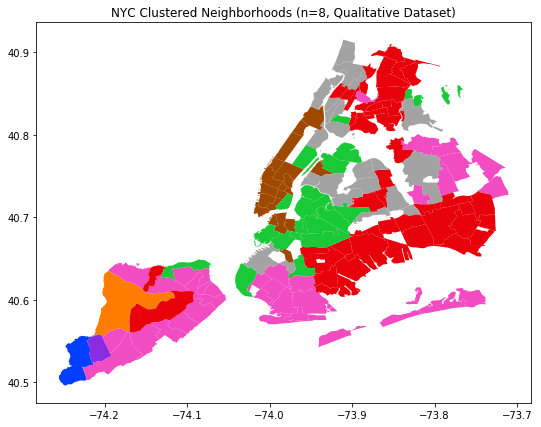

In [248]:
nyc_qual.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=8, Qualitative Dataset)')
plt.savefig('images/map_qual.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


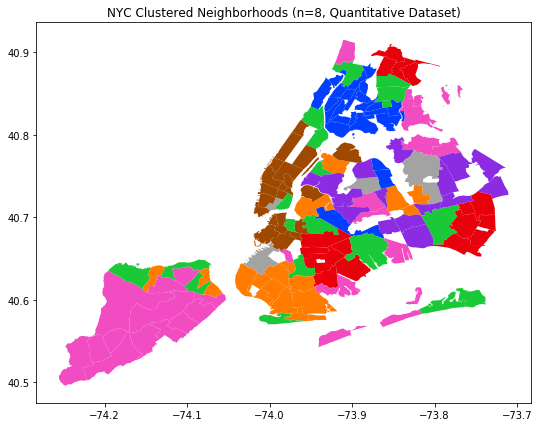

In [249]:
nyc_quant.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('NYC Clustered Neighborhoods (n=8, Quantitative Dataset)')
plt.savefig('images/map_quant.png')

# Save Cluster Information to CSV

In [233]:
qual = pd.DataFrame(qual_pca_by_neighborhood[['neighborhood_id','kmean']])
qual.columns = ['neighborhood_id','kmean_qual']
quant = pd.DataFrame(quant_pca_by_neighborhood[['neighborhood_id','kmean']])
quant.columns = ['neighborhood_id','kmean_quant']

all_kmeans = pca_by_neighborhood[['neighborhood_id','kmean']].merge(qual,on='neighborhood_id')
all_kmeans = all_kmeans.merge(quant,on='neighborhood_id')
all_kmeans

,neighborhood_id,kmean,kmean_qual,kmean_quant
0,1,0,3,2
1,2,1,6,6
2,3,2,2,1
3,4,1,6,1
4,5,5,5,5
5,6,1,6,6
6,7,1,6,4
7,8,1,6,2
8,9,2,2,2
9,10,1,6,4


In [238]:
all_kmeans.to_csv('cleaned_data/kmeans.csv',index=False)